<a href="https://colab.research.google.com/github/LokeshShanmugam18/CODSOFT_ML_PROJECT/blob/main/churn_prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import keras
import re
import os
from keras.models import load_model
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.0


In [ ]:
dataset_path= '/content/Churn_Modelling.csv'

df= pd.read_csv(dataset_path)

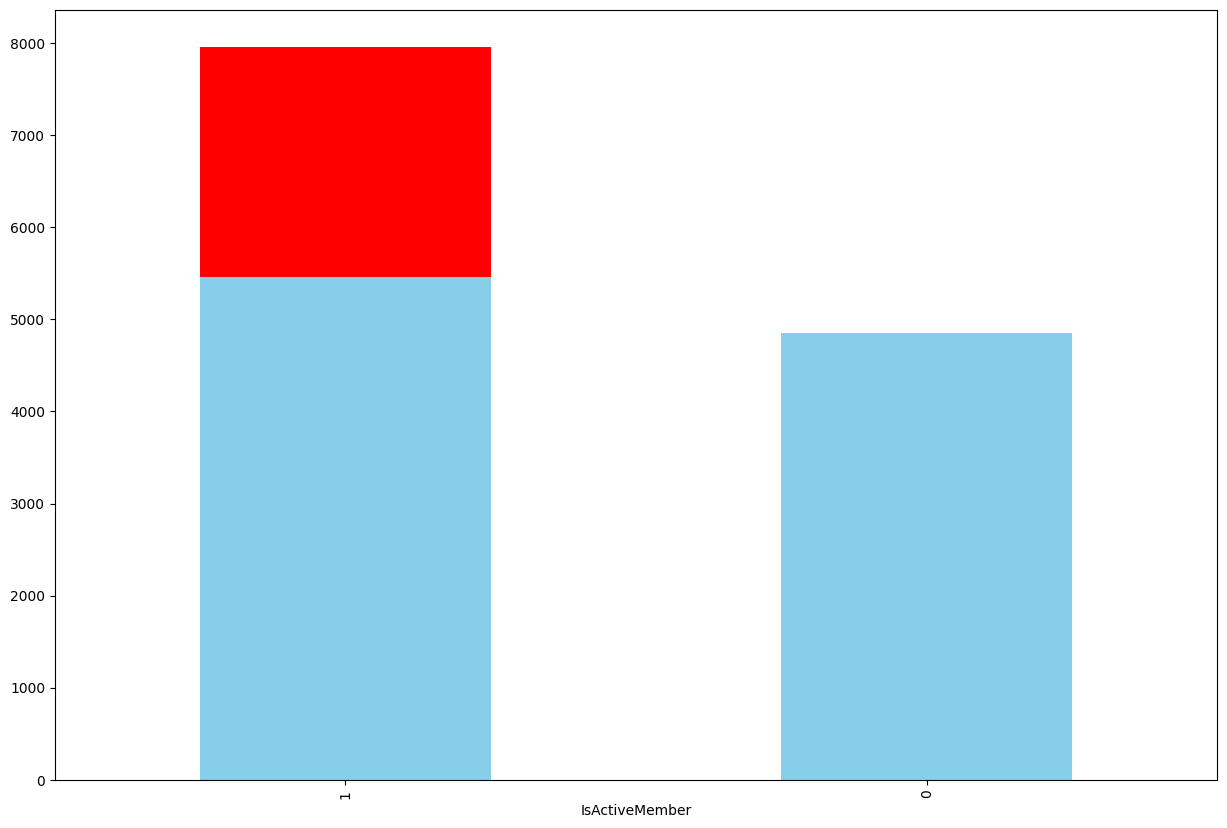

In [ ]:
df .head()
df.isnull().sum()
df.dtypes

count = df['Exited']
count.value_counts().plot(kind="bar",figsize=(15,10),color='red')
count.value_counts()

df['Geography'].value_counts().plot(kind="bar",figsize=(15,10),color='skyblue')
df['Geography'].value_counts()

df['Gender'].value_counts().plot(kind="bar",figsize=(15,10),color='skyblue')
df['Gender'].value_counts()

df['Age'].value_counts().plot(kind="bar",figsize=(15,10),color='skyblue')
df['Age'].value_counts()
df['IsActiveMember'].value_counts().plot(kind="bar",figsize=(15,10),color='skyblue')
df['IsActiveMember'].value_counts()
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace= True)

In [ ]:
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['Geography','Gender']
for col in columns_to_convert_in_string_to_int:
    df[col] = label_encoder.fit_transform(df[col])
columns_to_convert_in_int_to_float = ['CreditScore','Geography','Gender', 'Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
for col in columns_to_convert_in_int_to_float:
    df[col] = df[col].astype('float64')
df.dtypes
df.head()
X = df.drop(columns=['Exited'])
Y = df['Exited']
scaler = StandardScaler()
X= scaler.fit_transform(X)
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

model = Sequential([
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=15, batch_size=64, validation_split=0.2)
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,Y_train)
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train,Y_train)
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'\n Accuracy: {accuracy}')

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7327 - loss: 0.5815 - val_accuracy: 0.7981 - val_loss: 0.4657
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.4661 - val_accuracy: 0.8100 - val_loss: 0.4288
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.4233 - val_accuracy: 0.8281 - val_loss: 0.4134
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8154 - loss: 0.4184 - val_accuracy: 0.8356 - val_loss: 0.4002
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8317 - loss: 0.4060 - val_accuracy: 0.8425 - val_loss: 0.3869
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8374 - loss: 0.3957 - val_accuracy: 0.8487 - val_loss: 0.3752
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8447 - loss: 0.3815 - val_accuracy: 0.8512 - val_loss: 0.3681
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.3822 - val_accuracy: 0.

In [ ]:
y_pred_tf = (model.predict(X_test) > 0.5).astype("int32")

y_pred_log_reg = log_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log_reg)}")
print(classification_report(Y_test, y_pred_log_reg))

y_pred_gb = gb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_gb)}")
print(classification_report(Y_test, y_pred_gb))

y_pred_forest = random_forest.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_forest)}")
print(classification_report(Y_test, y_pred_forest))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.8655
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0

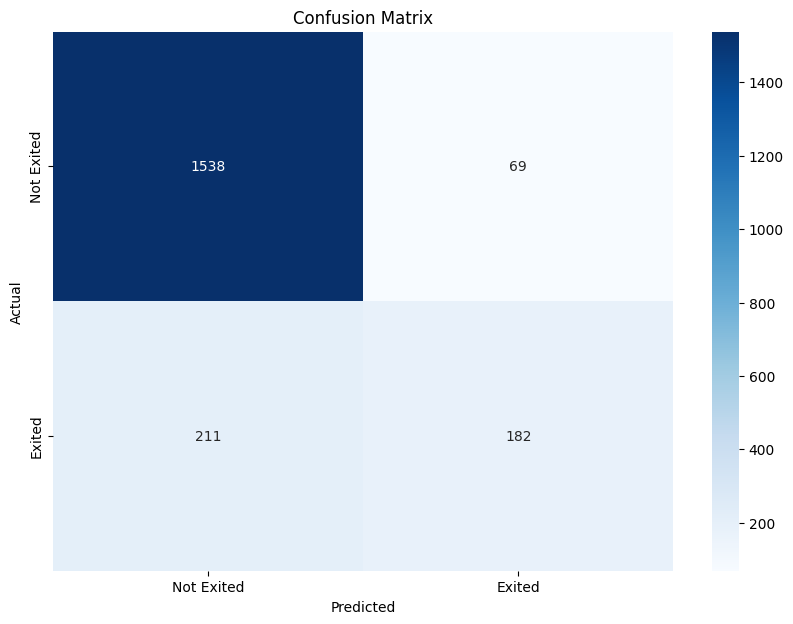

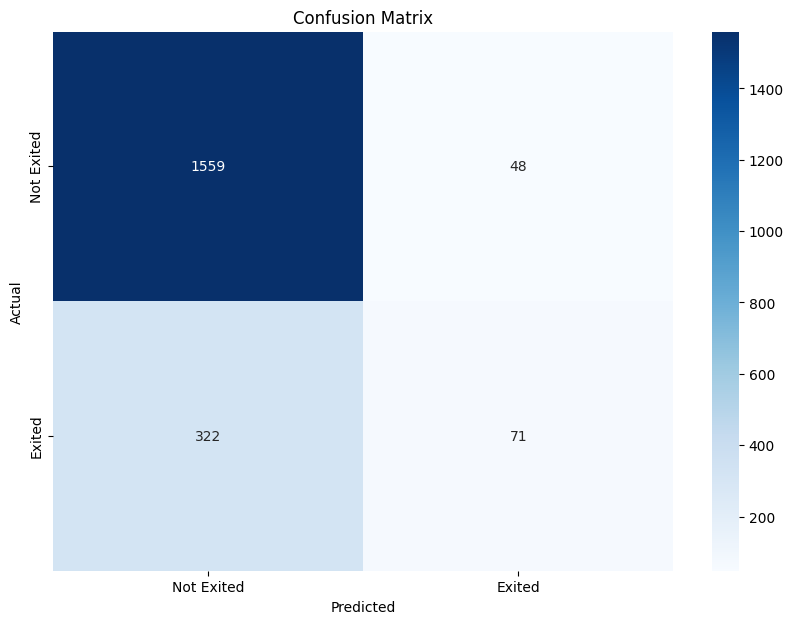

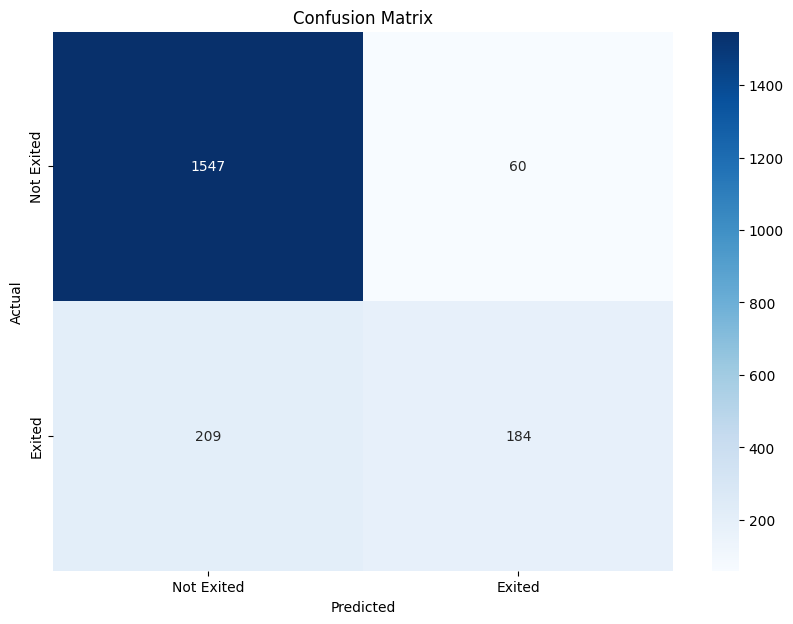

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(Y_test, y_pred_tf)
plot_confusion_matrix(Y_test, y_pred_log_reg)
plot_confusion_matrix(Y_test, y_pred_gb)